In [1]:
from envs import tictactoe

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline

import utilities

In [2]:
for n in range(5):
    print(tictactoe.rotate((1, 2, 3, 4), n))

(1, 2, 3, 4)
(2, 3, 4, 1)
(3, 4, 1, 2)
(4, 1, 2, 3)
(1, 2, 3, 4)


In [3]:
foo = ((1, 2), (3, 4))
bar = tictactoe.replace(foo, 0, 0, -1)
print(foo)
print(bar)

((1, 2), (3, 4))
((-1, 2), (3, 4))


In [4]:
def run_random_game(size=3, players=2):
    state = tictactoe.BoardState.initial(3, 2)
    yield state
    while not state.is_done:
        state = state(state.random_action)
        yield state

random_game = list(run_random_game())
for state in random_game:
    print(state)

BoardState(board=((0, 0, 0), (0, 0, 0), (0, 0, 0)), player_order=(1, 2))
BoardState(board=((0, 0, 0), (0, 1, 0), (0, 0, 0)), player_order=(2, 1))
BoardState(board=((0, 0, 0), (0, 1, 0), (2, 0, 0)), player_order=(1, 2))
BoardState(board=((1, 0, 0), (0, 1, 0), (2, 0, 0)), player_order=(2, 1))
BoardState(board=((1, 0, 0), (0, 1, 0), (2, 0, 2)), player_order=(1, 2))
BoardState(board=((1, 0, 0), (0, 1, 1), (2, 0, 2)), player_order=(2, 1))
BoardState(board=((1, 0, 2), (0, 1, 1), (2, 0, 2)), player_order=(1, 2))
BoardState(board=((1, 0, 2), (0, 1, 1), (2, 1, 2)), player_order=(2, 1))
BoardState(board=((1, 0, 2), (2, 1, 1), (2, 1, 2)), player_order=(1, 2))
BoardState(board=((1, 1, 2), (2, 1, 1), (2, 1, 2)), player_order=(2, 1))


X|X|O
─────
O|X|X
─────
O|X|O
Last Play: X


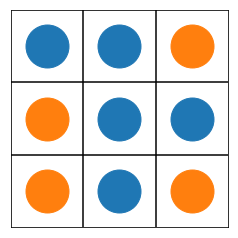

In [5]:
printer = tictactoe.BoardStatePrinter()
printer.print(random_game[-1])

plotter = tictactoe.BoardStatePlotter()
_ = plotter.plot(random_game[-1])


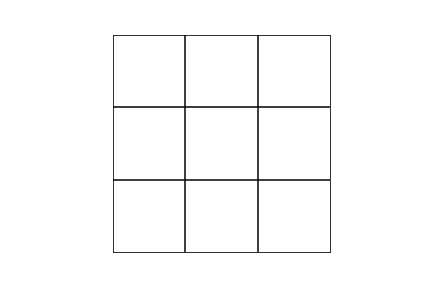

In [6]:
from matplotlib.animation import ArtistAnimation

fig = plt.figure()
frames = [plotter.plot(state) for state in random_game]
ani = animation.ArtistAnimation(fig, frames, blit=True)
utilities.display_animation(ani, fps=4)